In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

nba_df= pd.read_csv("Resources/shot_logs.csv")


In [4]:
nba_df

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [5]:
#id unique shooters, and count
nba_shooter= nba_df['player_name'].unique()
print(len(nba_shooter))
name_check= nba_df['CLOSEST_DEFENDER_PLAYER_ID'].unique()
print(len(name_check))

grouped_def_df=nba_df.groupby("CLOSEST_DEFENDER_PLAYER_ID")
#convert all NaN in Shot_clock category to game_clock
#drop columns
cleaned_df= nba_df.drop(columns=["MATCHUP", "LOCATION", "DRIBBLES", "TOUCH_TIME"])
cleaned_df

281
474


,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,W,24,3,1,0:00,NaN,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,L,-16,7,4,11:10,23.0,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [6]:
#convert all NaN in Shot_clock category to game_clock

In [7]:
#rename player_name and player_id to fit all caps style
cleaned_df.rename(columns={"player_name": "PLAYER_NAME",
                  "player_id": "PLAYER_ID"})

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,PLAYER_NAME,PLAYER_ID
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,W,24,3,1,0:00,NaN,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,L,-16,7,4,11:10,23.0,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [8]:
#convert all NaN in Shot_clock category to game_clock
cleaned_df["SHOT_CLOCK"].fillna(cleaned_df["GAME_CLOCK"], inplace=True)
cleaned_df

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,W,24,3,1,0:00,0:00,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,L,-16,7,4,11:10,23,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [9]:
cleaned_df.dtypes

GAME_ID                         int64
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                     object
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object

In [10]:


to_clean= cleaned_df["GAME_CLOCK"].str.split(":",expand=True).astype(int)
cleaned_df["GAME_CLOCK_SECONDS"]=to_clean[0]*60 + to_clean[1]
counter= 0
cleaned_df["TOTAL_TIME_SECONDS"] = ""
for index,rows in cleaned_df.iterrows(): 
    multiplier= 0
    if rows["PERIOD"] == 1:
        multiplier= 36*60
    elif rows["PERIOD"] == 2:
        multiplier= 24*60
    elif rows["PERIOD"] == 3:
        multiplier= 12*60
    cleaned_df.loc[index,["GAME_TIME_REMAINING (seconds)"]]=multiplier+cleaned_df["GAME_CLOCK_SECONDS"][index]

cleaned_df

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,GAME_CLOCK_SECONDS,TOTAL_TIME_SECONDS
0,21400899,W,24,1,1,1:09,10.8,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,69,2229
1,21400899,W,24,2,1,0:14,3.4,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,14,2174
2,21400899,W,24,3,1,0:00,0:00,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,0,2160
3,21400899,W,24,4,2,11:47,10.3,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,707,2147
4,21400899,W,24,5,2,10:34,10.9,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,634,2074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,L,-16,5,3,1:52,18.3,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127,112,832
128065,21400006,L,-16,6,4,11:28,19.8,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127,688,688
128066,21400006,L,-16,7,4,11:10,23,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127,670,670
128067,21400006,L,-16,8,4,2:37,9.1,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127,157,157


In [11]:
#cleaned_df.to_csv("Output Data/Final_nba_df.csv")

In [13]:
closest_defender = cleaned_df.groupby(["CLOSEST_DEFENDER"])
closest_defender2 = closest_defender["CLOSEST_DEFENDER"].unique()
# closest_defender.head()
defender_count = closest_defender["CLOSEST_DEFENDER"].count()
# defender_count
defender_failure = closest_defender["FGM"].sum()
defender_success = defender_count - defender_failure
success_rate = round((defender_success / defender_count), 2)

defender_df = pd.DataFrame({
    "No. of Times Closest Defender": defender_count,
    "No. of FG made against": defender_failure,
    "No. of successful defenses": defender_success,
    "Success Rate": success_rate
})


#format_df = ({'Success Rate':'{:,.2%}'})
defender_df.head()

,No. of Times Closest Defender,No. of FG made against,No. of successful defenses,Success Rate
CLOSEST_DEFENDER,,,,
"Acy, Quincy",276,118,158,0.57
"Adams, Jordan",30,16,14,0.47
"Adams, Steven",484,215,269,0.56
"Adrien, Jeff",73,40,33,0.45
"Afflalo, Arron",458,191,267,0.58


In [14]:
# Top Performing Defenders
#Sort and display the top ten defensive players by % missed FG's as the closest defender.
top_defense = defender_df.sort_values("Success Rate", ascending=False)
top_defense.head(10)

,No. of Times Closest Defender,No. of FG made against,No. of successful defenses,Success Rate
CLOSEST_DEFENDER,,,,
"Dragic, Zoran",2,0,2,1.00
"Ledo, Ricky",1,0,1,1.00
"Lucas, Kalin",1,0,1,1.00
"James, Bernard",32,7,25,0.78
"Udoh, Ekpe",13,3,10,0.77
"Green, JaMychal",13,3,10,0.77
"Datome, Gigi",4,1,3,0.75
"Robinson, Nate",99,27,72,0.73
"Mekel, Gal",10,3,7,0.70


In [15]:
# Top frequent defenders
#Sort and display the top ten defensive players by frequency as closest defender.
top_defense = defender_df.sort_values("No. of Times Closest Defender", ascending=False)
top_defense.head(10)

,No. of Times Closest Defender,No. of FG made against,No. of successful defenses,Success Rate
CLOSEST_DEFENDER,,,,
"Ibaka, Serge",814,334,480,0.59
"Jordan, DeAndre",795,381,414,0.52
"Gasol, Pau",754,354,400,0.53
"Green, Draymond",751,301,450,0.60
"Millsap, Paul",750,357,393,0.52
"Chandler, Tyson",698,329,369,0.53
"Vucevic, Nikola",697,335,362,0.52
"Frye, Channing",693,355,338,0.49
"Love, Kevin",691,315,376,0.54


In [24]:
# Find the most frequent defenders
frequent_flyer = defender_df.loc[defender_df["No. of Times Closest Defender"] >= 600]
frequent_flyer.head(25)

,No. of Times Closest Defender,No. of FG made against,No. of successful defenses,Success Rate
CLOSEST_DEFENDER,,,,
"Aldridge, LaMarcus",655,302,353,0.54
"Asik, Omer",610,297,313,0.51
"Bledsoe, Eric",650,280,370,0.57
"Chandler, Tyson",698,329,369,0.53
"Davis, Anthony",609,247,362,0.59
"Dieng, Gorgui",652,334,318,0.49
"Drummond, Andre",609,296,313,0.51
"Duncan, Tim",637,286,351,0.55
"Frye, Channing",693,355,338,0.49


In [25]:
# Top Performing Defenders
# Now that we've got the players with the highest frequency of being closest defender, 
#sort and display the top ten defensive players by % missed FG's as the closest defender.
top_defense2 = frequent_flyer.sort_values("Success Rate", ascending=False)
top_defense2.head(10).style.format(format_df)

,No. of Times Closest Defender,No. of FG made against,No. of successful defenses,Success Rate
CLOSEST_DEFENDER,,,,
"Green, Draymond",751,301,450,60.00%
"Davis, Anthony",609,247,362,59.00%
"Ibaka, Serge",814,334,480,59.00%
"Noah, Joakim",632,267,365,58.00%
"Bledsoe, Eric",650,280,370,57.00%
"Smith, Josh",651,278,373,57.00%
"Harden, James",607,264,343,57.00%
"Gasol, Marc",629,274,355,56.00%
"Gortat, Marcin",688,302,386,56.00%


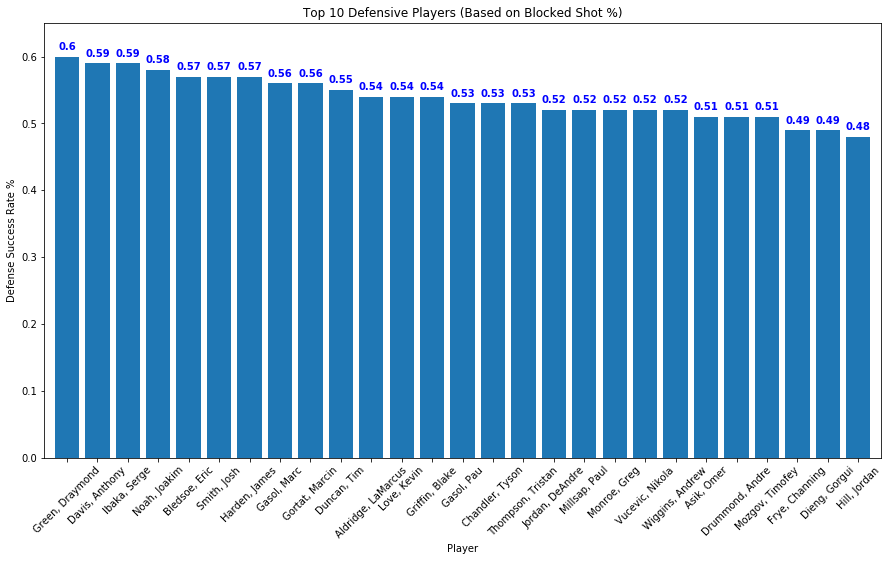

In [34]:
# Reset index to create graphs
defense_bar_df = top_defense2.reset_index()
#defense_bar.head()
# Create bar graph of top defensive players
fig1, ax1 = plt.subplots(figsize=(15,8))

plt.bar(defense_bar_df["CLOSEST_DEFENDER"], defense_bar_df["Success Rate"])
plt.xticks(rotation=45)
plt.xlabel("Player")
plt.ylabel("Defense Success Rate %")
plt.title("Top 10 Defensive Players (Based on Blocked Shot %)")
plt.xlim(-0.75, len(defense_bar_df["CLOSEST_DEFENDER"])-0.25)
plt.ylim(0, max(defense_bar_df["Success Rate"])+0.05)

for i, v in enumerate(defense_bar_df["Success Rate"]):
    plt.text(i + .0001, v + .01, str(v), color='blue', fontsize = 10, fontweight='bold', ha='center')

plt.savefig('Output_Data/Images/best_defender_bar.png')
plt.show()

# Quarter vs. Shot Success Rate

In [44]:
# Copy dataframe and create bins
period_df = cleaned_df

# Create bins
bins = [0, 719, 1439, 2159, 2879] 

# Create Group Labels
group_names = ["720-0 (4th QTR)", "1439-720 (3rd QTR)","2159-1440 (2nd QTR)", "2880-2160 (1st QTR)" ]

#Add bins
period_df["Time Remaining on Game Clock (Seconds)"] = pd.cut(period_df["TOTAL_TIME_SECONDS"], bins, labels=group_names)

# Groupby
shots_by_period = period_df.groupby("Time Remaining on Game Clock (Seconds)")
made_shots = shots_by_period["FGM"].sum()
#scores_by_spend = scores_by_spend_df.mean()
success_rate_bin = made_shots / (shots_by_period["FGM"].count())
success_rate_bin


shots_by_quarter = pd.DataFrame ({"Shot Success Rate (%)": success_rate_bin})

format_df = ({'Shot Success Rate (%)':'{:,.2%}'})
shots_by_quarter.head().style.format(format_df)
#grouped_spend_df = scores_by_spend.drop(['Total Students', 'Total School Budget', 'Per Student Budget'], axis=1)

,Shot Success Rate (%)
Time Remaining on Game Clock (Seconds),
720-0 (4th QTR),43.90%
1439-720 (3rd QTR),45.72%
2159-1440 (2nd QTR),45.11%
2880-2160 (1st QTR),46.05%
